In [1]:
import pandas_datareader.data as web
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
from pandas_datareader._utils import RemoteDataError
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import pickle

In [2]:
def plot_stock_trend_and_returns(ticker, titles, start_date, end_date, all_returns):
    
    #get the data for this ticker
    prices = yf.download('^GSPC',start_date,end_date).Close
    prices.index = [d.date() for d in prices.index]
    
    plt.figure(figsize=(10,6))
    
    #plot stock price
    plt.subplot(2,1,1)
    plt.plot(prices)
    plt.title(titles[0], fontsize=16)
    plt.ylabel('Price ($)', fontsize=14)
    
    #plot stock returns
    plt.subplot(2,1,2)
    plt.plot(all_returns[0], all_returns[1], color='g')
    plt.title(titles[1], fontsize=16)
    plt.ylabel('Pct. Return', fontsize=14)
    plt.axhline(0, color='k', linestyle='--')
    
    plt.tight_layout()
    
    plt.show()

In [3]:
def perform_analysis_for_stock(ticker, start_date, end_date, return_period_weeks, verbose=False):
    """
    Inputs:
        ticker: the ticker symbol to analyze
        start_date: the first date considered in simulation
        end_date: the last date considered in simulation
        return_period_weeks: the number of weeks in which to calculate returns
        verbose: True if you want to print simulation steps
        
    Outputs:
        average and standard deviation of returns for simulated runs of this ticker within the given date range
    """
    
    #get the data for this ticker
    try:
        prices = yf.download(ticker,start_date,end_date).Close
        #could not find data on this ticker
    except (RemoteDataError, KeyError):
        #return default values
        return -np.inf, np.inf, None
    
    prices.index = [d.date() for d in prices.index]
    
    #this will store all simulated returns
    pct_return_after_period = []
    buy_dates = []

    #assume we buy the stock on each day in the range
    for buy_date, buy_price in prices.iteritems():#here loop is for two value so we need iteritems 
        #get price of the stock after given number of weeks
        sell_date = buy_date + timedelta(weeks=return_period_weeks)
        
        try:
            sell_price = prices[prices.index == sell_date].iloc[0]
        #trying to sell on a non-trading day, skip
        except IndexError:
            continue
        
        #compute the percent return
        pct_return = (sell_price - buy_price)/buy_price
        pct_return_after_period.append(pct_return)
        buy_dates.append(buy_date)
        
        if verbose:
            print('Date Buy: %s, Price Buy: %s'%(buy_date,round(buy_price,2)))
            print('Date Sell: %s, Price Sell: %s'%(sell_date,round(sell_price,2)))
            print('Return: %s%%'%round(pct_return*100,1))
            print('-------------------')
    
    #if no data collected return default values
    if len(pct_return_after_period) == 0:
        return -np.inf, np.inf, None
    
    #report average and deviation of the percent returns
    return np.mean(pct_return_after_period), np.std(pct_return_after_period), [buy_dates, pct_return_after_period]

In [4]:
start_date, end_date = datetime(2020,4,1),datetime.now().date()
return_period_weeks=4
yf.download('^GSPC',start_date,end_date).Close

[*********************100%***********************]  1 of 1 completed


Date
2020-03-31    2584.590088
2020-04-01    2470.500000
2020-04-02    2526.899902
2020-04-03    2488.649902
2020-04-06    2663.679932
                 ...     
2022-12-21    3878.439941
2022-12-22    3822.389893
2022-12-23    3844.820068
2022-12-27    3829.250000
2022-12-28    3783.219971
Name: Close, Length: 693, dtype: float64

In [5]:
avg_return, dev_return, all_returns = perform_analysis_for_stock("DIS", start_date, end_date, return_period_weeks)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


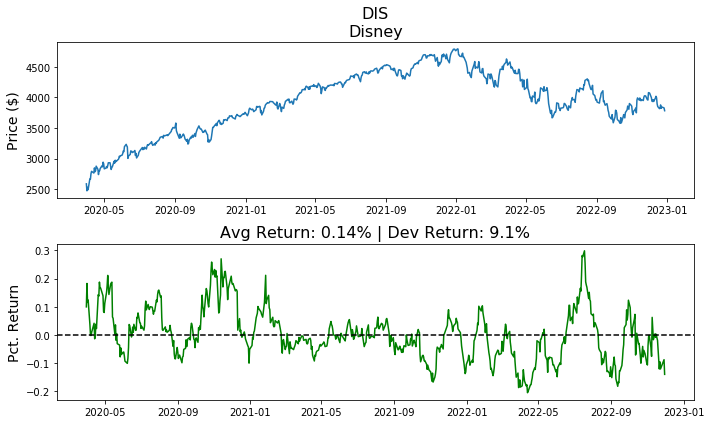

In [6]:
title_price = '%s\n%s'%("DIS", "Disney")
title_return = 'Avg Return: %s%% | Dev Return: %s%%'%(round(100*avg_return,2), round(100*dev_return,2))
plot_stock_trend_and_returns("DIS", [title_price, title_return], start_date, end_date, all_returns)

In [7]:
#start date for simulation. 
#Further back means more training data but risk of including patterns that no longer exist
#More recent means less training data but only using recent patterns
start_date, end_date = datetime(2020,4,1), datetime.now().date()

#set number of weeks in which you want to see return
return_period_weeks = 4

#I want at least this much average return
min_avg_return  = 0.1

#I want at most this much volatility in return
max_dev_return = 0.07

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


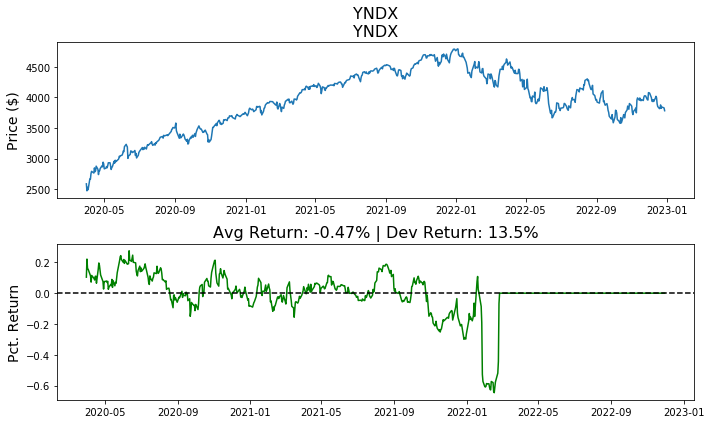

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


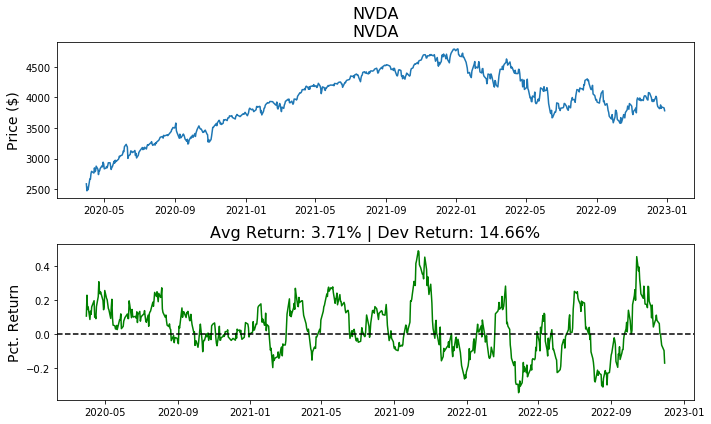

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


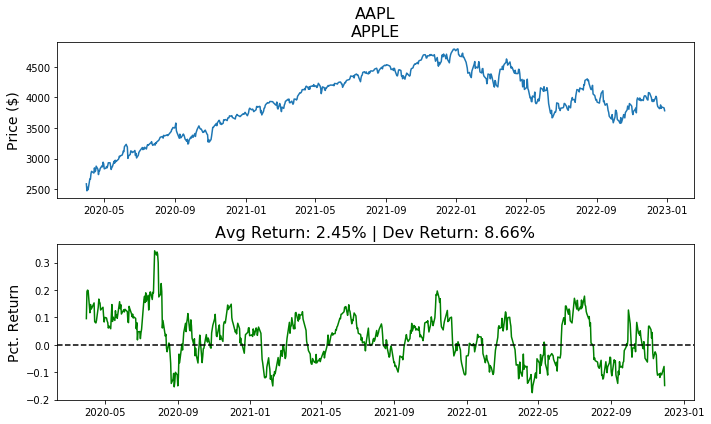

In [8]:
#Download file "series_tickers.p" from github or create your own list of tickers
series_tickers = {"YNDX":"YNDX","NVDA":"NVDA","AAPL":"APPLE"}
for ticker, name in series_tickers.items():
    avg_return, dev_return, all_returns = perform_analysis_for_stock(ticker, start_date, end_date, return_period_weeks)

    if avg_return < min_avg_return and dev_return > max_dev_return:
        title_price = '%s\n%s'%(ticker, name)
        title_return = 'Avg Return: %s%% | Dev Return: %s%%'%(round(100*avg_return,2), round(100*dev_return,2))
        plot_stock_trend_and_returns(ticker, [title_price, title_return], start_date, end_date, all_returns)


In [9]:
prices=yf.download('^GSPC',start_date,end_date).Close#collecting closing price from ticker
prices

[*********************100%***********************]  1 of 1 completed


Date
2020-03-31    2584.590088
2020-04-01    2470.500000
2020-04-02    2526.899902
2020-04-03    2488.649902
2020-04-06    2663.679932
                 ...     
2022-12-21    3878.439941
2022-12-22    3822.389893
2022-12-23    3844.820068
2022-12-27    3829.250000
2022-12-28    3783.219971
Name: Close, Length: 693, dtype: float64

In [10]:
prices.index=[d.date() for d in prices.index]#collecting datetime as price index

In [11]:
prices.index

Index([2020-03-31, 2020-04-01, 2020-04-02, 2020-04-03, 2020-04-06, 2020-04-07,
       2020-04-08, 2020-04-09, 2020-04-13, 2020-04-14,
       ...
       2022-12-14, 2022-12-15, 2022-12-16, 2022-12-19, 2022-12-20, 2022-12-21,
       2022-12-22, 2022-12-23, 2022-12-27, 2022-12-28],
      dtype='object', length=693)

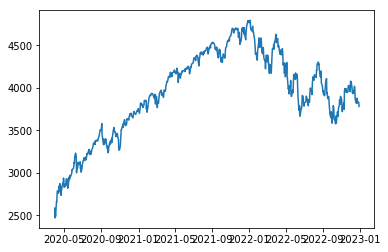

In [12]:
 plt.plot(prices)